In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import load_df_florida

In [2]:
from yahist import set_default_style, Hist1D
set_default_style()

In [3]:
dfc = load_df_florida()

In [4]:
dfc

,age,case,contact,county,died,edvisit,eventdate,gender,hospitalized,jurisdiction,origin,travel_related,known_status
0,53,2020-07-02 05:00:00,NO,Broward,False,UNKNOWN,2020-07-02 00:00:00,M,UNKNOWN,Non-FL resident,NA,Unknown,False
1,40,2020-07-02 05:00:00,Yes,Indian River,False,NO,2020-06-26 00:00:00,M,NO,FL resident,NA,No,True
2,34,2020-07-02 05:00:00,UNKNOWN,Taylor,False,NO,2020-07-02 00:00:00,F,NO,FL resident,NA,No,True
3,30,2020-07-02 05:00:00,UNKNOWN,Manatee,False,UNKNOWN,2020-07-02 00:00:00,M,NO,FL resident,NA,No,True
4,11,2020-07-02 05:00:00,Yes,Dade,False,YES,2020-06-25 00:00:00,F,NO,FL resident,NA,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
778631,43,2020-07-18 05:00:00,NA,Dade,False,UNKNOWN,2020-07-18 00:18:57,M,UNKNOWN,FL resident,NA,Unknown,False
778632,25,2020-07-18 05:00:00,Yes,Broward,False,NO,2020-07-13 00:00:00,F,NO,FL resident,NA,No,True
778633,39,2020-09-30 05:00:00,NO,Orange,False,NO,2020-09-27 00:00:00,M,NO,FL resident,NA,No,True
778634,21,2020-09-30 05:00:00,Yes,Hillsborough,False,UNKNOWN,2020-09-29 00:00:00,M,UNKNOWN,FL resident,NA,No,False


In [5]:
n = (dfc["county"].isin(["Leon","Alachua"])).sum()
print(f"Leon and Alachua counties have {n} cases mainly between 18-21 which skews the distribution")
# df = dfc.set_index("case")["2020-09-04":"2020-09-10"].query("county=='Leon' or county=='Alachua'")
df = dfc.set_index("case").query("county=='Leon' or county=='Alachua'")
Hist1D(df["age"],bins=50)

Leon and Alachua counties have 21980 cases mainly between 18-21 which skews the distribution


[212.00 ± 14.56   142.00 ± 11.92   126.00 ± 11.22   132.00 ± 11.49
 149.00 ± 12.21   161.00 ± 12.69   203.00 ± 14.25   289.00 ± 17.00
 1661.00 ± 40.76   3931.00 ± 62.70   3569.00 ± 59.74   889.00 ± 29.82
 777.00 ± 27.87   717.00 ± 26.78   630.00 ± 25.10   530.00 ± 23.02
 499.00 ± 22.34   483.00 ± 21.98   416.00 ± 20.40   438.00 ± 20.93
 626.00 ± 25.02   377.00 ± 19.42   387.00 ± 19.67   429.00 ± 20.71
 360.00 ± 18.97   376.00 ± 19.39   365.00 ± 19.10   389.00 ± 19.72
 363.00 ± 19.05   302.00 ± 17.38   402.00 ± 20.05   238.00 ± 15.43
 223.00 ± 14.93   197.00 ± 14.04   162.00 ± 12.73   135.00 ± 11.62
 122.00 ± 11.05   91.00 ± 9.54   80.00 ± 8.94   82.00 ± 9.06
 93.00 ± 9.64   59.00 ± 7.68   41.00 ± 6.40   47.00 ± 6.86   37.00 ± 6.08
 24.00 ± 4.90    7.00 ± 2.65    6.00 ± 2.45    3.00 ± 1.73    3.00 ± 1.73]

In [6]:
dfc = dfc.query("not(county=='Leon' or county=='Alachua')")

In [7]:
dfc["died"].value_counts()

False    735396
True      16431
Name: died, dtype: int64

In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751827 entries, 0 to 778635
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   age             751827 non-null  int64         
 1   case            751827 non-null  datetime64[ns]
 2   contact         751827 non-null  object        
 3   county          751827 non-null  object        
 4   died            751827 non-null  bool          
 5   edvisit         733017 non-null  object        
 6   eventdate       751827 non-null  datetime64[ns]
 7   gender          751827 non-null  object        
 8   hospitalized    748896 non-null  object        
 9   jurisdiction    751827 non-null  object        
 10  origin          751827 non-null  object        
 11  travel_related  751827 non-null  object        
 12  known_status    751827 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64(1), object(8)
memory usage: 70.3+ MB


In [9]:
dfc["gender"].value_counts()

F    387816
M    364011
Name: gender, dtype: int64

In [10]:
dfc["hospitalized"].value_counts()

NO         387791
UNKNOWN    312526
YES         47931
NA            648
Name: hospitalized, dtype: int64

<AxesSubplot:xlabel='case'>

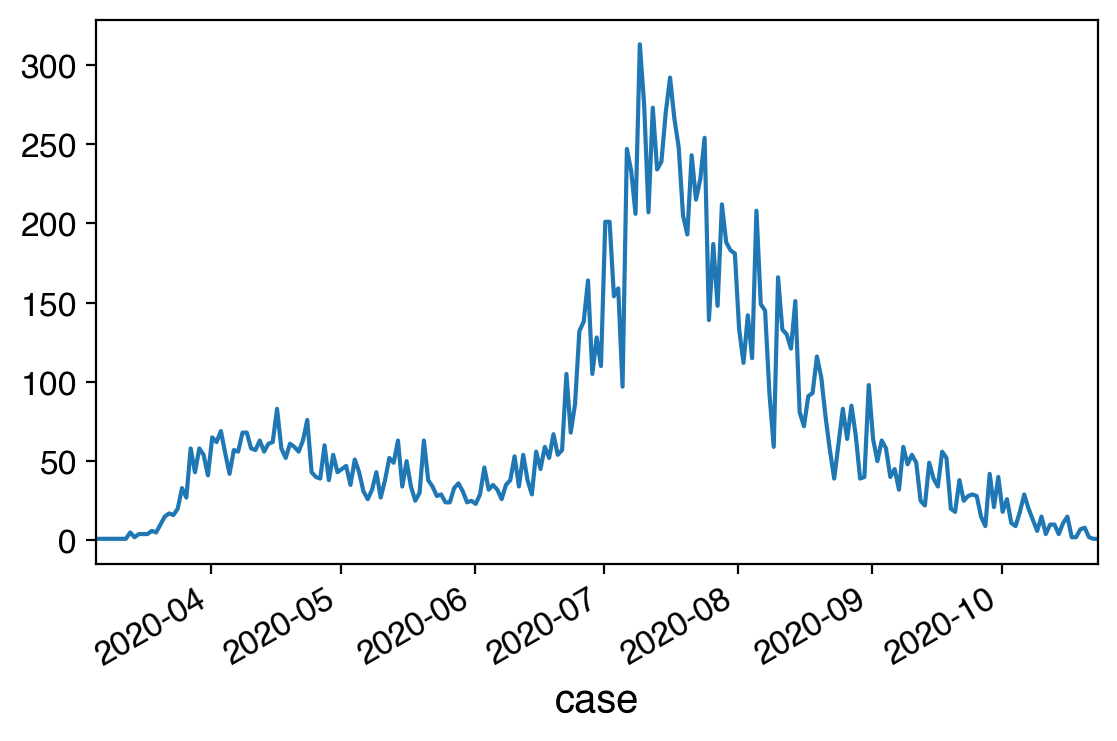

In [11]:
# dfc.groupby("case")["gender"].count().plot()
dfc.query("died").groupby("case")["gender"].count().plot()
# dfc.groupby("eventdate")["gender"].count().plot()

In [12]:
# df = dfc.query("known_status")
# df.groupby("case")["gender"].count().plot(label="report (known)")
# df.groupby("eventdate")["gender"].count().plot(label="event (known)")

# df = dfc.query("not known_status")
# df.groupby("case")["gender"].count().plot(label="report (unknown)")
# df.groupby("eventdate")["gender"].count().plot(label="event (unknown)")

# plt.gca().legend()

<AxesSubplot:ylabel='Frequency'>

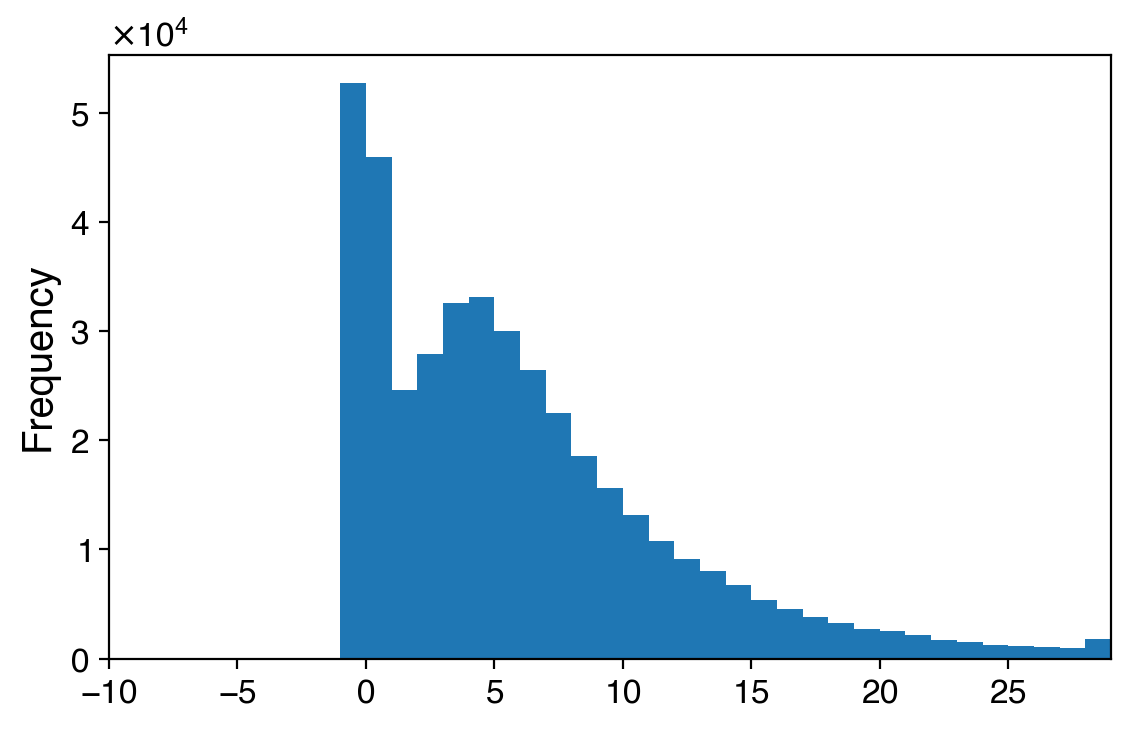

In [13]:
df = dfc.query("not died and known_status")
((df["case"]-df["eventdate"]).dt.days).plot.hist(bins=np.arange(-10,30))

In [14]:
dfc["age"].astype(int)

0         53
1         40
2         34
3         30
4         11
          ..
778631    43
778632    25
778633    39
778634    21
778635    20
Name: age, Length: 751827, dtype: int64

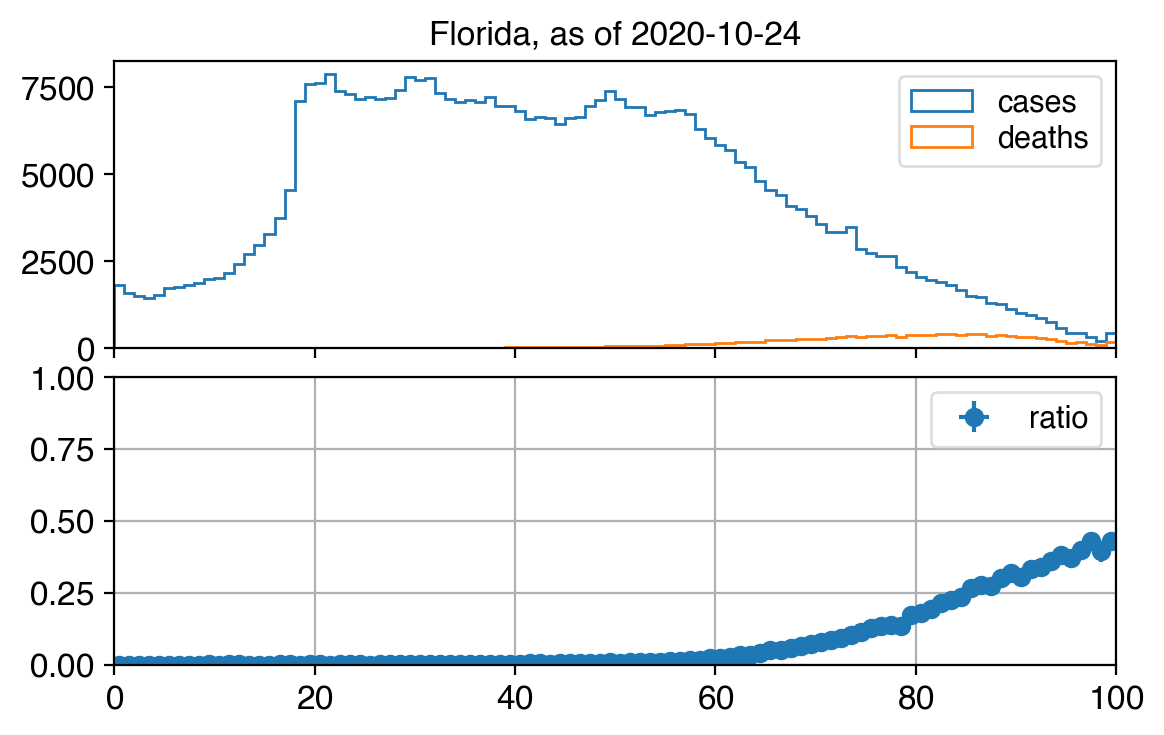

In [15]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)

bins = "100,0,100"

# dfnumer = dfc.query("died")
dfnumer = dfc.query("died and known_status")
dfdenom = dfc.query("known_status")

hnumer = Hist1D(dfnumer["age"],bins=bins)
hdenom = Hist1D(dfdenom["age"],bins=bins)

hdenom.plot(ax=ax1, label="cases", histtype="step")
hnumer.plot(ax=ax1, label="deaths", histtype="step")

# ax1.set_yscale("log")

hratio = hnumer.divide(hdenom,binomial=True)
hratio.plot(ax=ax2, show_errors=True, label="ratio")

ax1.set_title(f"Florida, as of {str(dfc['case'].max()).split()[0]}")
ax2.set_ylim(bottom=0.,top=1.)
ax1.legend()
ax2.legend()
ax2.grid()

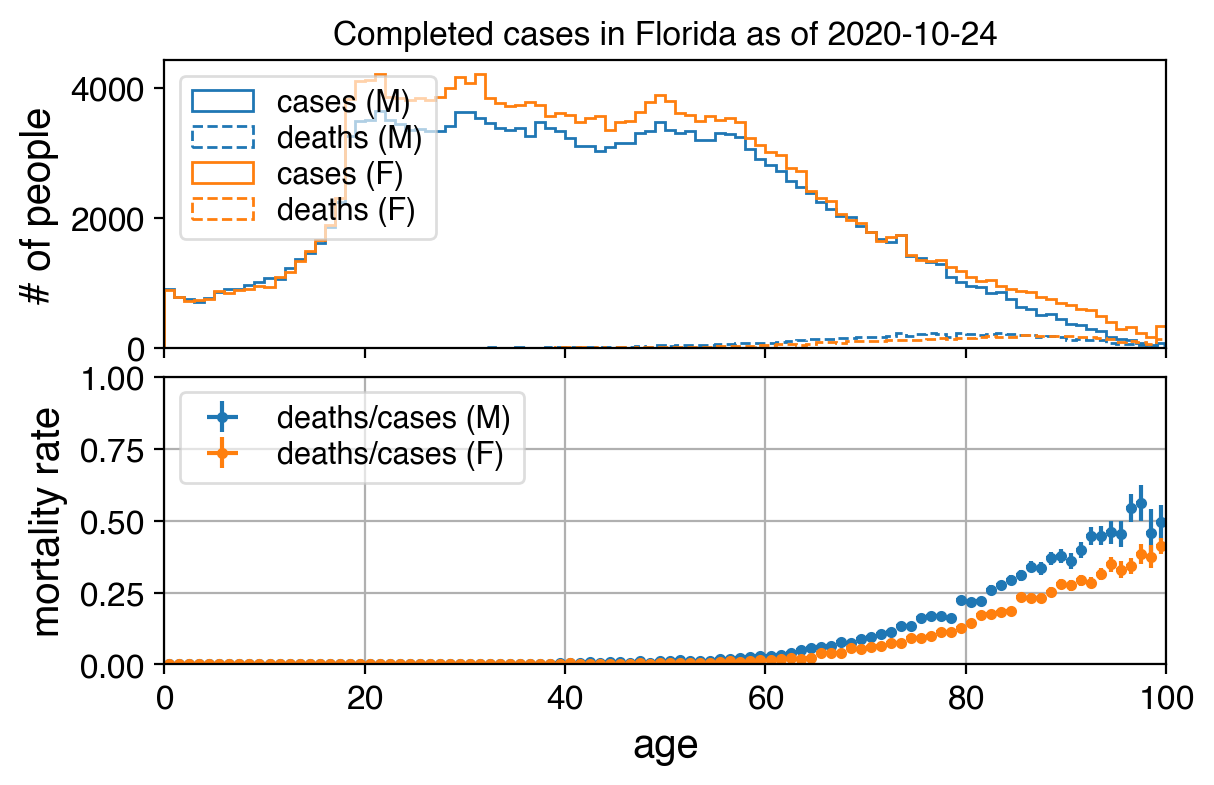

In [16]:

fig, (ax1,ax2) = plt.subplots(2,sharex=True)

def hists_gender(gender, bins="100,0,100", known=True):
    if gender in ["M","F"]:
        selstr = f"gender=='{gender}'"
    else:
        selstr = "gender!='X'"
    if known:
        selstr += " and known_status"
    dfnumer = dfc.query(selstr + " and died")
    dfdenom = dfc.query(selstr)
    hnumer = Hist1D(dfnumer["age"],bins=bins)
    hdenom = Hist1D(dfdenom["age"],bins=bins)
    hratio = hnumer.divide(hdenom,binomial=True)
    return hnumer, hdenom, hratio

hnumer, hdenom, hratio = hists_gender("M")
hdenom.plot(ax=ax1, label="cases (M)", histtype="step", color="C0")
hnumer.plot(ax=ax1, label="deaths (M)", histtype="step", color="C0", linestyle="--")
hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (M)", color="C0", ms=3)

hnumer, hdenom, hratio = hists_gender("F")
hdenom.plot(ax=ax1, label="cases (F)", histtype="step", color="C1")
hnumer.plot(ax=ax1, label="deaths (F)", histtype="step", color="C1", linestyle="--")
hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (F)", color="C1", ms=3)

# hnumer, hdenom, hratio = hists_gender("M", known=False)
# hdenom.plot(ax=ax1, label="cases (M), all", histtype="step", color="C2")
# hnumer.plot(ax=ax1, label="deaths (M), all", histtype="step", color="C2", linestyle="--")
# hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (M), all", color="C2", ms=3)

# hnumer, hdenom, hratio = hists_gender("F", known=False)
# hdenom.plot(ax=ax1, label="cases (F), all", histtype="step", color="C3")
# hnumer.plot(ax=ax1, label="deaths (F), all", histtype="step", color="C3", linestyle="--")
# hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (F), all", color="C3", ms=3)


last = str(dfc['case'].max()).split()[0]
ax1.set_title(f"Completed cases in Florida as of {last}")
# ax1.set_yscale("log")
ax1.legend(loc="upper left")
ax1.set_ylabel("# of people")

ax2.legend(loc="upper left")
ax2.set_ylabel("mortality rate")
ax2.set_ylim(bottom=0.,top=1.0)
ax2.set_xlabel("age")
ax2.grid()

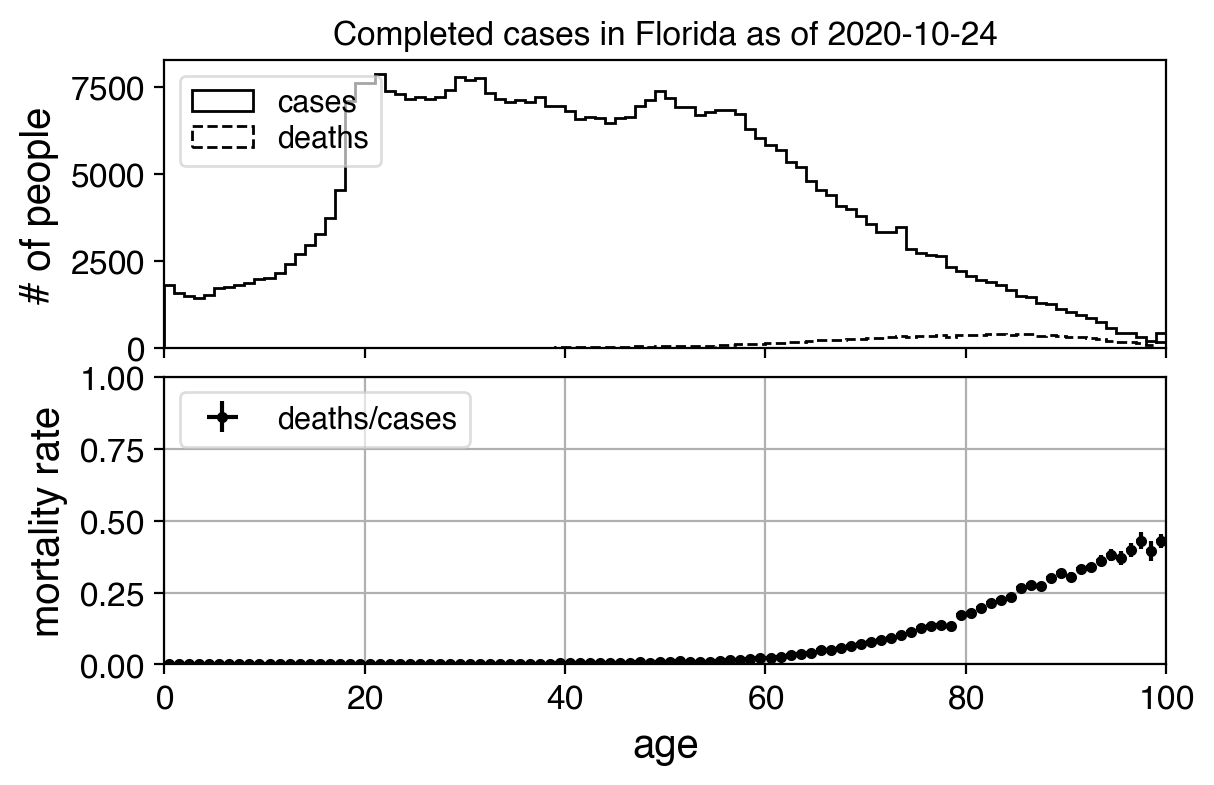

In [17]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)

hnumer, hdenom, hratio = hists_gender("X", bins="100,0,100")
hdenom.plot(ax=ax1, label="cases", histtype="step", color="k")
hnumer.plot(ax=ax1, label="deaths", histtype="step", color="k", linestyle="--")
hratio.plot(ax=ax2, show_errors=True, label="deaths/cases", color="k", ms=3)

last = str(dfc['case'].max()).split()[0]
ax1.set_title(f"Completed cases in Florida as of {last}")
# ax1.set_yscale("log")
ax1.legend(loc="upper left")
ax1.set_ylabel("# of people")

ax2.legend(loc="upper left")
ax2.set_ylabel("mortality rate")
ax2.set_ylim(bottom=0.,top=1.0)
ax2.set_xlabel("age")
ax2.grid()

In [18]:
(hnumer.counts * hnumer.bin_centers).sum() / hnumer.counts.sum()

77.11572361690406

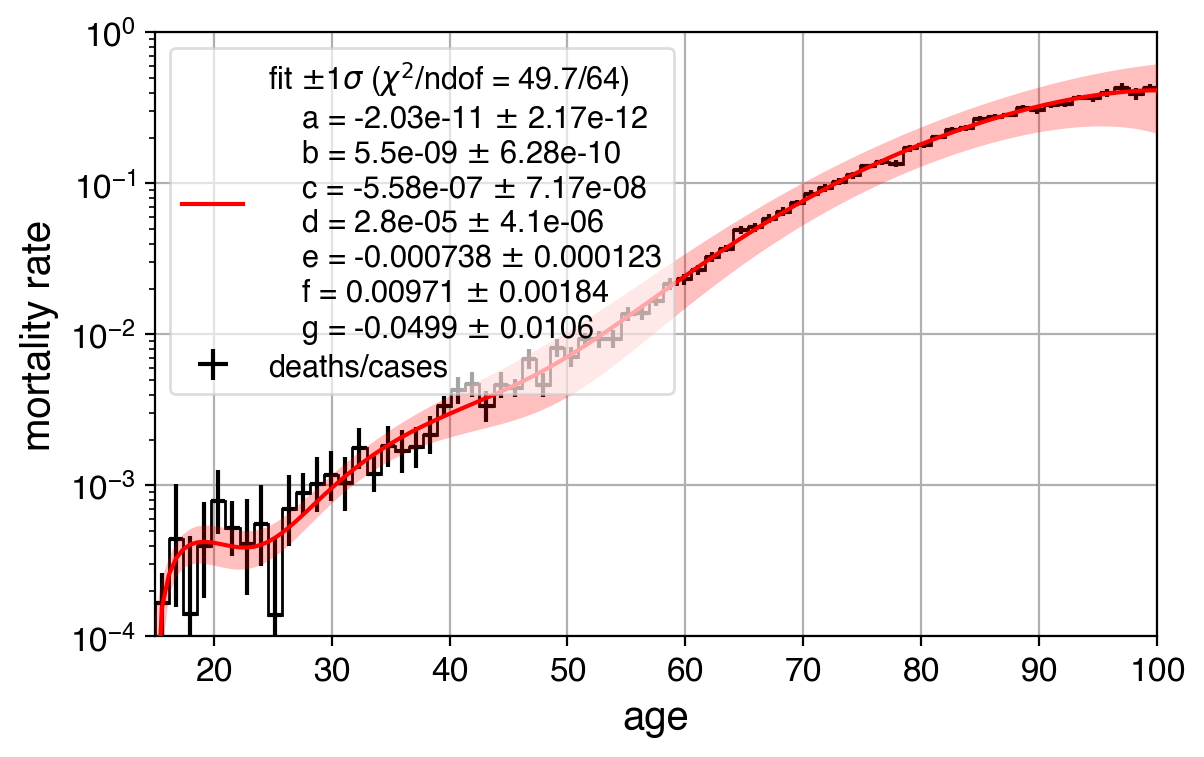

In [19]:
fig, ax = plt.subplots()

# hratio = hists_gender("X",bins=np.linspace(35,100,27))[-1]
hratio = hists_gender("X",bins=np.linspace(15,100,18*4))[-1]
hratio.plot(ax=ax, color="k", histtype="step")
hratio.plot(ax=ax, show_errors=True, label="deaths/cases", color="k", ms=0)

func = "np.poly1d([a,b,c,d,e,f,g])(x)"
res = hratio.fit(func)

ax.legend(loc="upper left")
ax.set_ylabel("mortality rate")
# ax.set_ylim(bottom=0.001,top=1.0)
ax.set_ylim(bottom=0.0001,top=1.0)
ax.set_yscale("log")
ax.set_xlabel("age")
ax.grid()

In [27]:
# np.poly([1,2,3])
from yahist.utils import expr_to_lambda
# df_cfr = pd.DataFrame()
# np.poly1d([a,b,c,d,e])(x)
poly = expr_to_lambda(func)
ages = np.array([20,30,40,50,60,70,80])
cfrs = poly(ages,*[res["params"][par]["value"] for par in "abcdefg"])
df_cfr = pd.DataFrame(dict(cfr=cfrs, age=ages))
df_cfr

,cfr,age
0,0.000417,20
1,0.000961,30
2,0.002983,40
3,0.007117,50
4,0.024447,60
5,0.076681,70
6,0.181720,80


Text(0.5, 1.0, 'Florida cases getting younger?')

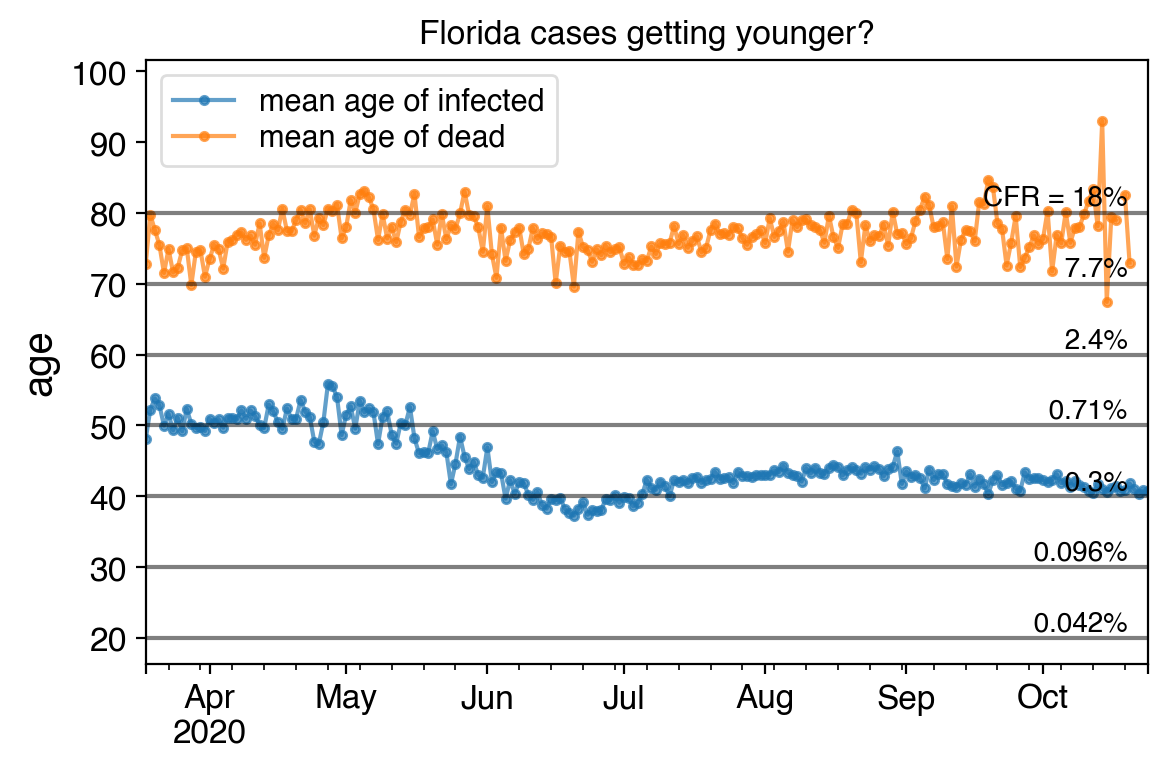

In [28]:
fig, ax = plt.subplots()
interval = "1d"
df = dfc.set_index("case").sort_index()["Mar 18, 2020":]

df.resample(interval)["age"].mean().plot(marker=".",label="mean age of infected", alpha=0.7)
# df.rolling(interval)["age"].mean().plot(marker=".",label="mean age of infected")

df = df.query("known_status and died")

df.resample(interval)["age"].mean().plot(marker=".",label="mean age of dead", alpha=0.7)
# df.rolling(interval)["age"].mean().plot(marker=".",label="mean age of dead")

import matplotlib.transforms as transforms
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
for i,row in df_cfr.iterrows():
    cfr = row["cfr"]*100.
    age = row["age"]
    ax.axhline(age, color="k", alpha=0.5)
    text = "CFR = {:.2g}%".format(cfr)
    if i != len(df_cfr)-1: text = text.replace("CFR =", "")
    ax.text(0.98, age+2.0, text, color="k", transform=trans, va="center", ha="right", fontsize=10)
ax.set_ylim([None, ax.get_ylim()[1]+5.])
ax.set_xlabel("")
ax.legend()
ax.set_ylabel("age")
ax.set_title("Florida cases getting younger?")

(10.0, 95.0)

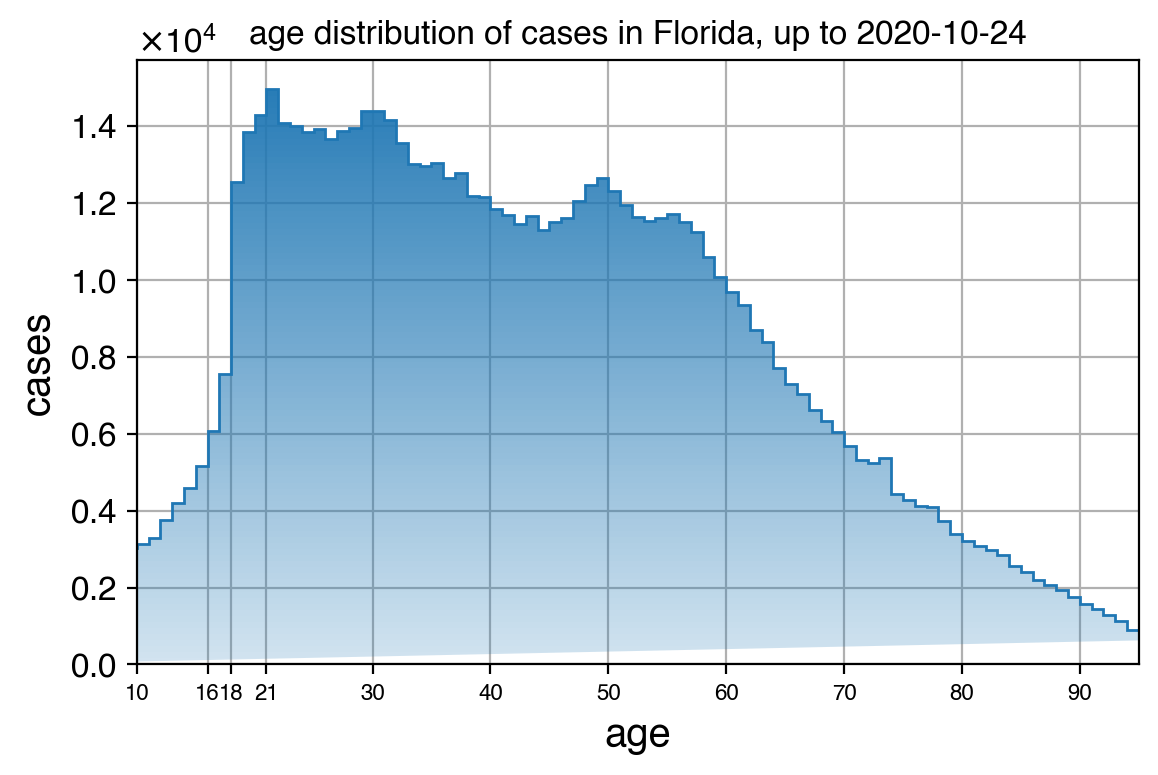

In [29]:
fig, ax = plt.subplots()
h1 = Hist1D(dfc["age"], bins="100,0,100")
h1.plot(gradient=True)
ax.set_xlabel("age")
ax.set_ylabel("cases")
latest = str(dfc['case'].max()).split()[0]
ax.set_title(f"age distribution of cases in Florida, up to {latest}")

# ax.set_xscale("log")
from matplotlib.ticker import FixedLocator
vals = [0,10,16,18,21,30,40,50,60,70,80,90,100]
ax.xaxis.set_major_locator(FixedLocator(vals))
ax.grid()
ax.set_xticklabels(map(str,vals), fontsize=8);
ax.set_xlim([10,95])

Text(0.5, 0, 'age')

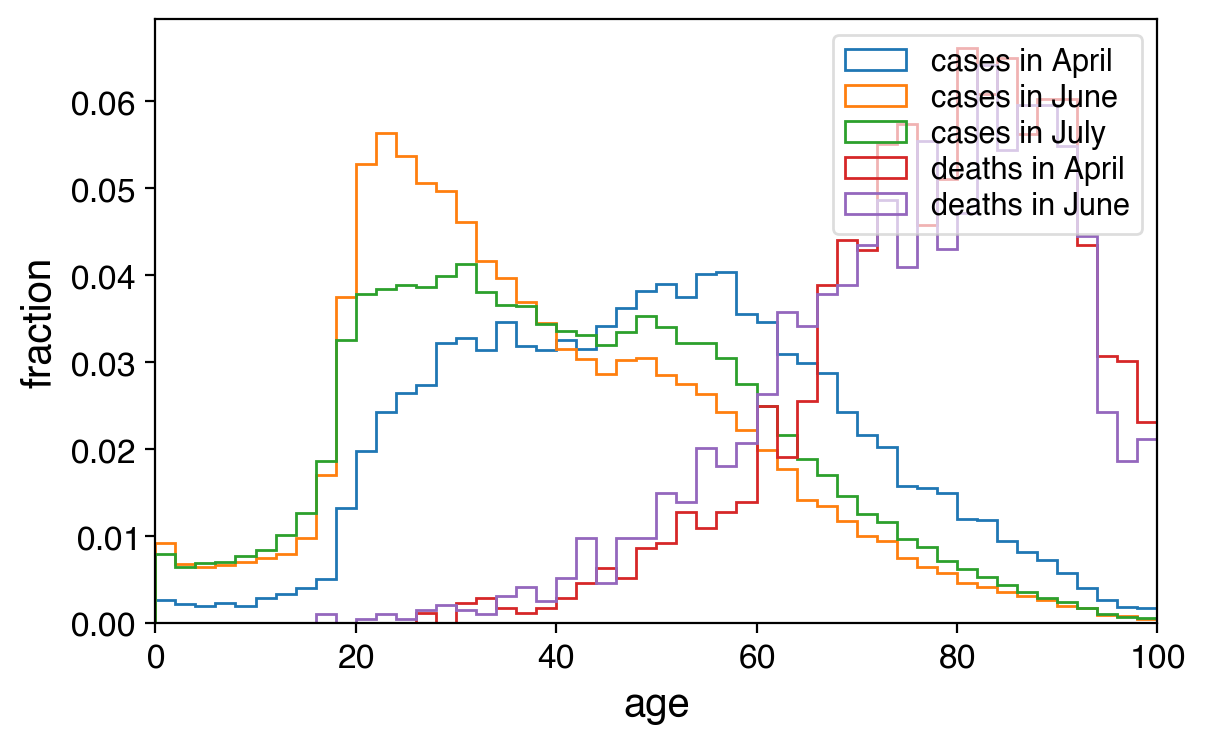

In [30]:
bins = "50,0,100"
df = dfc.set_index("case")
h1 = Hist1D(df["Apr 1, 2020":"Apr 30, 2020"].query("not died")["age"], bins=bins).normalize()
h2 = Hist1D(df["Jun 1, 2020":"Jun 30, 2020"].query("not died")["age"], bins=bins).normalize()
h3 = Hist1D(df["Jul 1, 2020":"Jul 30, 2020"].query("not died")["age"], bins=bins).normalize()
h1.plot(histtype="step", label="cases in April")
h2.plot(histtype="step", label="cases in June")
h3.plot(histtype="step", label="cases in July")
# h1.plot(gradient=True, label="cases in April")
# h2.plot(gradient=True, label="cases in June")

h1 = Hist1D(df["Apr 1, 2020":"Apr 30, 2020"].query("died")["age"], bins=bins).normalize()
h2 = Hist1D(df["Jun 1, 2020":"Jun 30, 2020"].query("died")["age"], bins=bins).normalize()
h1.plot(histtype="step", label="deaths in April")
h2.plot(histtype="step", label="deaths in June")
# h1.plot(gradient=True, label="deaths in April")
# h2.plot(gradient=True, label="deaths in June")

plt.gca().set_ylabel("fraction")
plt.gca().set_xlabel("age")

In [31]:

dfc.set_index("case").sort_index()["Feb 21, 2020":]

,age,contact,county,died,edvisit,eventdate,gender,hospitalized,jurisdiction,origin,travel_related,known_status
case,,,,,,,,,,,,
2020-03-02 05:00:00,63,Yes,Manatee,False,YES,2020-02-22 00:00:00,M,YES,FL resident,NA,No,True
2020-03-02 05:00:00,29,Yes,Hillsborough,False,NO,2020-02-22 00:00:00,F,NO,FL resident,ITALY,Yes,True
2020-03-03 05:00:00,22,Yes,Hillsborough,False,NO,2020-02-25 00:00:00,F,NO,Non-FL resident,ITALY,Yes,True
2020-03-03 05:00:00,54,UNKNOWN,Gadsden,False,None,2020-02-02 00:00:00,M,UNKNOWN,Not diagnosed/isolated in FL,Japan,Yes,False
2020-03-04 05:00:00,66,YES,Okaloosa,False,NO,2020-01-20 00:00:00,F,NO,Not diagnosed/isolated in FL,JAPAN,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-24 05:00:00,51,Yes,Palm Beach,False,NO,2020-10-23 00:00:00,F,NO,FL resident,NA,No,True
2020-10-24 05:00:00,60,NA,Monroe,False,UNKNOWN,2020-10-24 05:19:05,M,UNKNOWN,FL resident,NA,Unknown,False
2020-10-24 05:00:00,74,NA,Marion,False,UNKNOWN,2020-10-24 05:09:05,M,UNKNOWN,FL resident,NA,Unknown,False


Text(0.5, 0, 'age')

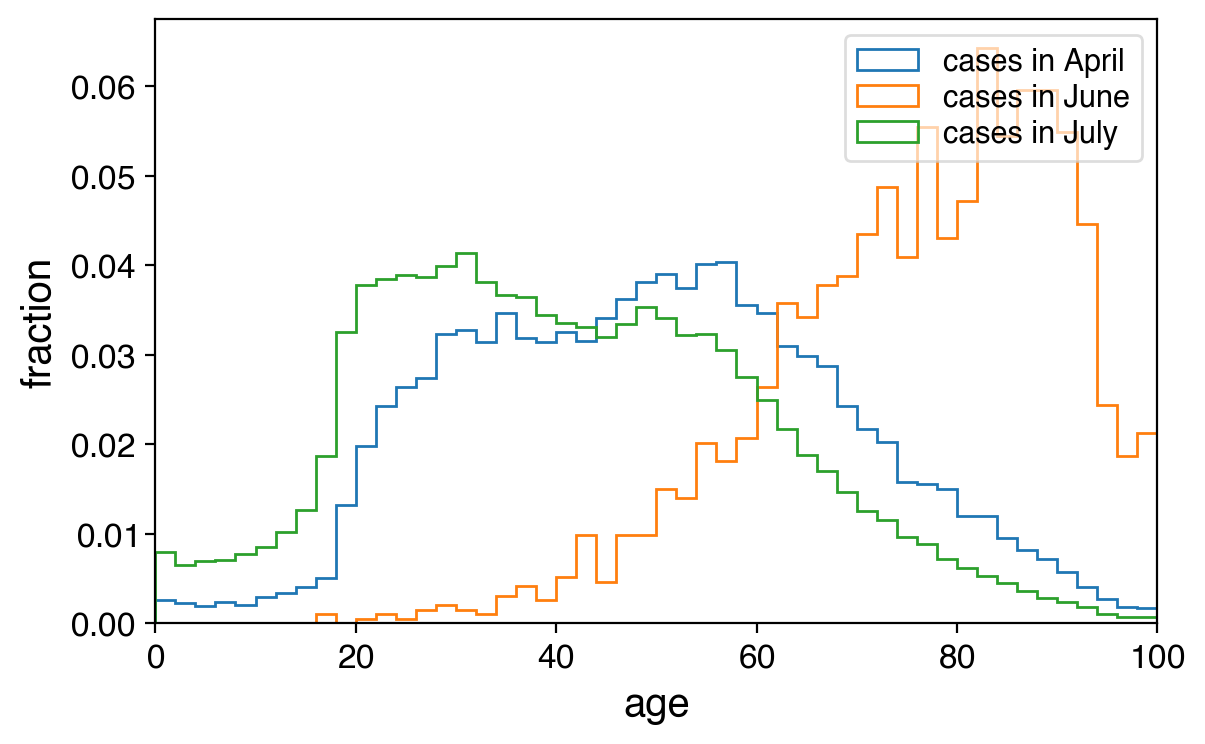

In [32]:
bins = "50,0,100"
df = dfc.set_index("case")
h1 = Hist1D(df["Apr 1, 2020":"Apr 30, 2020"].query("not died")["age"], bins=bins).normalize()
h1.plot(histtype="step", label="cases in April")
h2.plot(histtype="step", label="cases in June")
h3.plot(histtype="step", label="cases in July")

plt.gca().set_ylabel("fraction")
plt.gca().set_xlabel("age")

In [33]:
%%time
from ipywidgets import interact
import ipywidgets as widgets
import base64
from io import BytesIO

from IPython.display import HTML
# HTML(Hist1D().svg_matplotlib())

def f(start=62,ndays=30):

#     start = 62
#     ndays = 30

    bins = "100,0,100"
    df = dfc[["case","age","died"]]
    # df = df.set_index("case")
    dayofyear = df.case.dt.dayofyear
    df = df[(dayofyear >= start) & (dayofyear < start+ndays)]
#     df = df[~df.died]
#     h1 = Hist1D(df["age"], bins=bins).normalize()
    h1 = Hist1D(df["age"], bins=bins)
#     h1 = h1.normalize()
    fig, ax = plt.subplots()
#     h1.plot(histtype="step", gradient=True)
    h1.plot(histtype="step")
    ax.fill_between(h1.bin_centers, h1.counts-h1.errors, h1.counts+h1.errors, facecolor="C0", alpha=0.25, zorder=3, step="mid")

    ax.set_ylabel("cases per bin")
    ax.set_xlabel("age")
    title = f"Florida cases between {str(df.case.min()).split()[0]} and {str(df.case.max()).split()[0]}"
    ax.set_title(title);
    
#     ax.set_ylim([0., 0.04])
    
    buf = BytesIO()
    fig.savefig(buf, format="svg")
    plt.close(fig)
    data = base64.b64encode(buf.getbuffer()).decode("ascii")
    src = "<img src='data:image/svg+xml;base64,{}'/>".format(data)
    return HTML(src)
    
d1 = dfc.case.min().dayofyear
d2 = dfc.case.max().dayofyear
interact(f, start=widgets.IntSlider(min=d1, max=d2, step=1, value=62));

interactive(children=(IntSlider(value=62, description='start', max=298, min=62), IntSlider(value=30, descripti…

CPU times: user 366 ms, sys: 44 ms, total: 410 ms
Wall time: 415 ms


<function __main__.f(start=62, ndays=30)>

In [ ]:
df = dfc.set_index("case")["2020-09-10":"2020-09-20"].query("18<=age<=21")
df["county"].value_counts()